# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Dataset ini dikumpulkan secara manual dari observasi. Umumnya Grade atau Kualitas susu tergantung pada parameter ini.
Parameter ini memainkan peran penting dalam analisis prediktif susu.  

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality)
bertujuan untuk menganalisis, mengklasifikasi dan membuat model untuk memprediksi kualitas susu. Diharapkan
model ini bisa membantu dalam memprediksi kualitas susu apakah susu tersebut memiliki kualitas baik, normal,
atau buruk 

In [ ]:
Data Understanding

Dataset ini terdiri dari 8 kolom yang berisi 1 kolom float64, 6 kolom int64 dan 1 kolom objek.
Berikut atribut-atributnya :

0. pH : Tingkat keasaman susu           float64
1. Temprature : Temperatur susu         int64  
2. Taste : Rasa susu                    int64  
3. Odor : Aroma susu                    int64  
4. Fat : Lemak susu                     int64  
5. Turbidity : Tingkat kekentalan susu  int64  
6. Colour : Warna susu                  int64  
7. Grade : Kualitas susu                objek 

In [ ]:
Data Preparation

Yang dijadikan sebagai fitur adalah: 

1. pH
2. Temprature
3. Taste
4. Odor
5. Fat
6. Turbidity
7. Colour           

Sedangkan, yang menjadi target yaitu Grade

In [ ]:
Modeling

Model yang digunakan adalah KNN atau K-Nearest Neighbor

In [ ]:
Evaluation

Evaluasi merupakan tahap validasi model yang dibentuk berdasarkan parameter-parameter yang relevan.
Parameter tersebut bisa berupa Parameter statistik, Parameter ekonomi dan lain-lain.

In [ ]:
Deployment

Deployment dilakukan dengan menggunakan GitHub sebagai tempat menyimpan source code yang telah
dibuat dan Streamlit Share untuk mengaplikasikan source code yang telah diunggah di GitHub

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("milknew.csv")

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

# Transformasi Data

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Grade'] = le.fit_transform(df['Grade'])

In [7]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [8]:
df.to_csv('susu.csv')

In [10]:
df['Grade'].value_counts()

1    429
2    374
0    256
Name: Grade, dtype: int64

# Visualisasi Data

<Axes: xlabel='Grade', ylabel='Count'>

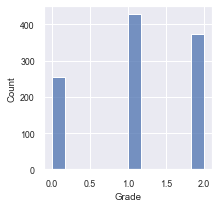

In [35]:
import seaborn as sns

plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=df, x='Grade')

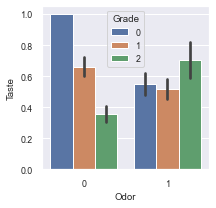

In [36]:
plt.figure(figsize=(3,3))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=df)
plt.show()

# Split data

In [11]:
X = df.drop(columns=['Grade'], axis=1)
Y = df['Grade']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, x_train.shape, x_test.shape)

(1059, 7) (847, 7) (212, 7)


# Membuat model training

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)

In [21]:
model = knn.fit(x_train, y_train)

# Evaluasi model

In [22]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [23]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.9917355371900827


In [24]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [25]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.9905660377358491


# Model Prediksi

In [33]:
input_data = (6.6, 37, 1, 1, 1, 1, 255)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi_susu = model.predict(data_reshaped)
print(prediksi_susu)

if (prediksi_susu[0] == 0):
    print('Kualitas Susu Baik')
elif (prediksi_susu == 1):
    print('Kualitas Susu Buruk')
else:
    print('Kualitas Susu Normal')

[0]
Kualitas Susu Baik


C:\Users\salsabila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Save Model

In [34]:
import pickle

filename = 'Kualitas_susu.sav'
pickle.dump(model, open(filename, 'wb'))